<a href="https://colab.research.google.com/github/ayushabhinav/FlowerClassification/blob/main/FlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ayushabhinav","key":"3ddcd48ba3efb72c6b4444109fbe531c"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d alxmamaev/flowers-recognition
! ls -lrt

mkdir: cannot create directory ‘/root/.kaggle’: File exists
flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)
total 230172
drwxr-xr-x 1 root root      4096 Sep 30 17:12  sample_data
-rw-r--r-- 1 root root        68 Oct  5 10:05  kaggle.json
-rw-r--r-- 1 root root 235663188 Oct  5 10:05  flowers-recognition.zip
drwxr-xr-x 7 root root      4096 Oct  5 10:05  flowers
drwxr-xr-x 2 root root      4096 Oct  5 10:05  flowers_binary
drwxr-xr-x 4 root root      4096 Oct  5 12:10  flower_model_multiclass
drwxr-xr-x 7 root root      4096 Oct  5 12:33  flower_test
drwxr-xr-x 2 root root      4096 Oct  5 12:40  flowers_binary_test
-rw-r--r-- 1 root root        68 Oct  5 12:46 'kaggle (1).json'


In [4]:
!unzip -q flowers-recognition.zip
! ls -lrt flowers

replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
total 240
drwxr-xr-x 2 root root 36864 Oct  5 12:47 daisy
drwxr-xr-x 2 root root 61440 Oct  5 12:47 dandelion
drwxr-xr-x 2 root root 45056 Oct  5 12:47 rose
drwxr-xr-x 2 root root 40960 Oct  5 12:47 sunflower
drwxr-xr-x 2 root root 61440 Oct  5 12:47 tulip


In [5]:
# imports

import os
import glob
import random
import shutil

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#setting up folder paths
dataset_path = os.path.join(os.getcwd(), 'flowers')

In [7]:
# creating the test data

! mkdir flower_test
test_dataset = os.path.join(os.getcwd(), 'flowers_test')
test_data_size = 0.1
for folder in os.listdir(dataset_path):
  if not (os.path.exists(os.path.join(test_dataset, folder))):
    os.makedirs(os.path.join(test_dataset, folder))

  files = os.listdir(os.path.join(dataset_path, folder))
  
  k = int(np.floor(len(files) * test_data_size))
  test_files = random.sample(files, k)
  [shutil.move(os.path.join(dataset_path, folder, f), os.path.join(test_dataset, folder, f)) for f in test_files ]
  

mkdir: cannot create directory ‘flower_test’: File exists


In [8]:
#count of images in each class
flower_type_count = pd.DataFrame( [[c, len(os.listdir(os.path.join(dataset_path, c)))] for c in os.listdir(dataset_path)], columns=['name', 'count'])
flower_type_count

,name,count
0,sunflower,660
1,dandelion,947
2,rose,707
3,daisy,689
4,tulip,886


In [9]:
def plot_images(images, title):
  fig, axes = plt.subplots(1, len(images))
  fig.set_figwidth(10)
  for ax, img in zip(axes, images):
    ax.imshow(img)
    ax.axis('off')
  plt.suptitle(c, fontsize=20, fontweight='bold')
  plt.show()

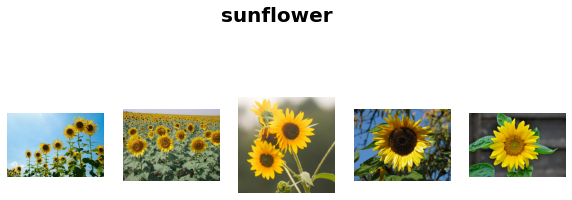

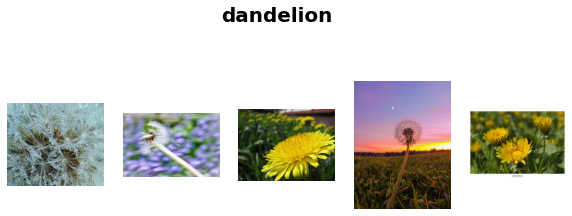

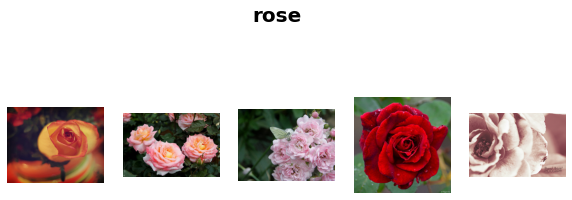

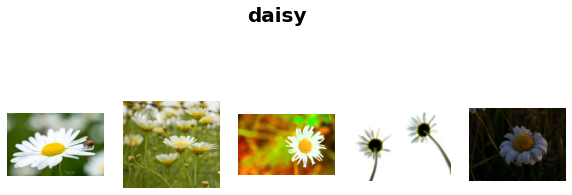

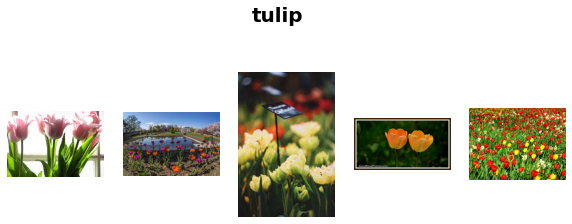

In [10]:
# visualizing some flowers from each class
for c in os.listdir(dataset_path):
  cpath = os.path.join(dataset_path, c)
  image_files = [random.choice(os.listdir(cpath))for i in range(5)]
  images = [plt.imread(os.path.join(cpath, image_file)) for image_file in image_files]
  plot_images(images, title=c)
  print()
    

### Preparing Data fro Binary Classification

In [11]:
!mkdir flowers_binary
!ln -s /content/flowers/rose /content/flowers_binary/rose
!ln -s /content/flowers/daisy /content/flowers_binary/daisy

!mkdir flowers_binary_test
!ln -s /content/flowers_test/rose /content/flowers_binary_test/rose
!ln -s /content/flowers_test/daisy /content/flowers_binary_test/daisy

mkdir: cannot create directory ‘flowers_binary’: File exists
ln: failed to create symbolic link '/content/flowers_binary/rose/rose': File exists
ln: failed to create symbolic link '/content/flowers_binary/daisy/daisy': File exists
mkdir: cannot create directory ‘flowers_binary_test’: File exists


In [12]:
binary_dataset_path = os.path.join(os.getcwd(), 'flowers_binary')
binary_test_dataset_path = os.path.join(os.getcwd(), 'flowers_binary_test')

### Custom Data Generator

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
# class MyDataGenerator(keras.utils.Sequence):

#   def __init__(self, dataset_path, mode='train', validation_perc=None, ablation=None, target_cls=None,
#                batch_size=32, dim=(256, 256), preprocessing_fn=None, n_channel=3, shuffle=True):
    
#     self.batch_size = batch_size
#     self.preprocessing_fn = preprocessing_fn
#     self.n_channel = n_channel
#     self.shuffle = shuffle
#     self.dim = dim
#     self.labels = {}
#     self.image_ID = []

#     if target_cls is None:
#       self.target_cls = os.listdir(dataset_path)
#     else:
#       self.target_cls = target_cls

#     self.n_classes = len(self.target_cls)


#     for i, cls in enumerate(self.target_cls):
#       paths = glob.glob(os.path.join(dataset_path, cls, '*'))
      
#       brk_point = len(paths)
#       if validation_perc is not None:
#         brk_point = int(len(paths) * (1- validation_perc))
      
#       if mode == 'train':
#         paths = paths[:brk_point]
#       else:
#         paths = paths[brk_point:]

#       if ablation is not None:
#         abl_point = int(len(paths) * ablation)
#         paths = paths[:abl_point]

#       self.image_ID += paths
#       self.labels.update({img:i for img in paths})

#     self.on_epoch_end()



#   def on_epoch_end(self):
#     self.indices = np.arange(len(self.image_ID))
#     if self.shuffle:
#       np.random.shuffle(self.indices)
      
#   def __len__(self):
#     return int(np.floor(len(self.image_ID)/self.batch_size ))


#   def __iter__(self):
#     for item in ( self.__getitem__(i) for i in range(len(self))):
#       yield item

#   def __getitem__(self, index):
#     print(index)
#     print(index * self.batch_size , (index +1) * self.batch_size)
#     indexes = self.indices[ index * self.batch_size : (index +1) * self.batch_size ]
#     ids = [ self.image_ID[idx] for idx in indexes]
#     X, y = self._generate_data(ids)
#     print(y.shape)
#     return X, y

#   def _generate_data(self, ids):

#     X = np.empty((self.batch_size, *self.dim, self.n_channel))
#     y = np.empty((self.batch_size), dtype=np.int)

#     for idx , id in enumerate(ids):
#       img = plt.imread(id)
#       img = np.resize(img, (*self.dim, self.n_channel))
#       # print(f' image shape :{img.shape}')
#       if self.preprocessing_fn is not None:
#         img = self.preprocessing_fn(img)
#         # print(f'processed image shape : f{img.shape}')
#       X[idx] = img
#       y[idx] = self.labels[id]

#     y = keras.utils.to_categorical(y, self.n_classes)
      
#     return X, y


In [15]:
# train_datagen = MyDataGenerator(dataset_path, target_cls=['rose', 'daisy'], validation_perc=.2, ablation=0.1, mode='train', dim=(224, 224), preprocessing_fn=keras.applications.resnet50.preprocess_input)
# valid_datagen = MyDataGenerator(dataset_path, target_cls=['rose', 'daisy'], validation_perc=.2, mode='validation', dim=(224, 224) preprocessing_fn=keras.applications.resnet50.preprocess_input)

In [16]:
# for d in train_datagen:
#   print(d[0].shape)

### Model Building for binary classification

#### Data Generator

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

prepro_fn = preprocess_input

# for ablation experiment
ablation_datagen = ImageDataGenerator(validation_split=0.9, preprocessing_function=prepro_fn )
ablation_train_data = ablation_datagen.flow_from_directory(binary_dataset_path, subset='training')
ablation_validation_data = ablation_datagen.flow_from_directory(binary_dataset_path, subset='validation')

# for final training
datagen  = ImageDataGenerator(validation_split=0.2,  preprocessing_function=prepro_fn )
train_data = datagen.flow_from_directory( binary_dataset_path, subset='training')
validation_data = datagen.flow_from_directory( binary_dataset_path, subset='validation')


test_datagen = ImageDataGenerator(preprocessing_function=prepro_fn )
test_data = test_datagen.flow_from_directory(binary_test_dataset_path)

Found 140 images belonging to 2 classes.
Found 1254 images belonging to 2 classes.
Found 1116 images belonging to 2 classes.
Found 278 images belonging to 2 classes.
Found 154 images belonging to 2 classes.


In [18]:
# for d in ablation_train_data:
#   print(d[0].shape)

#### Model

In [19]:
import tensorflow as tf
from tensorflow import keras

In [20]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
)

In [21]:
# building the model

image_dim = (224, 224)

inputs = keras.layers.Input(shape=[256,256, 3])
X = keras.layers.Resizing(*image_dim)(inputs)
X = base_model(inputs, training=False)
X = keras.layers.GlobalAveragePooling2D()(X)
X = keras.layers.Dropout(0.2)(X)
X = keras.layers.Dense(128, activation='relu')(X)
X = keras.layers.Dropout(0.5)(X)
outputs = keras.layers.Dense(2, activation='softmax')(X)

model = keras.Model(inputs, outputs)


In [22]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258   

In [23]:
earlystopping    = tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_accuracy', mode='max', restore_best_weights=True)

filepath = os.path.join(os.getcwd(), 'flower_model_binary')
if not os.path.exists(filepath):
  os.makedirs(filepath)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

In [24]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', tf.keras.metrics.AUC()])

In [25]:
history = model.fit(ablation_train_data, validation_data=validation_data, epochs=10, callbacks=[earlystopping, model_checkpoint])

Epoch 1/10
5/5 [==============================] - 21s 2s/step - loss: 3.0049 - accuracy: 0.4357 - auc: 0.4691 - val_loss: 0.9302 - val_accuracy: 0.4820 - val_auc: 0.4271
INFO:tensorflow:Assets written to: /content/flower_model_binary/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
5/5 [==============================] - 7s 1s/step - loss: 1.3141 - accuracy: 0.4571 - auc: 0.4522 - val_loss: 0.6942 - val_accuracy: 0.5432 - val_auc: 0.5387
INFO:tensorflow:Assets written to: /content/flower_model_binary/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/10
5/5 [==============================] - 7s 1s/step - loss: 0.7454 - accuracy: 0.5286 - auc: 0.5475 - val_loss: 0.6739 - val_accuracy: 0.5144 - val_auc: 0.6816
Epoch 4/10
5/5 [==============================] - 6s 1s/step - loss: 0.6507 - accuracy: 0.6071 - auc: 0.6562 - val_loss: 0.5783 - val_accuracy: 0.6727 - val_auc: 0.7774
INFO:tensorflow:Assets written to: /content/flower_model_binary/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/10
5/5 [==============================] - 7s 1s/step - loss: 0.5947 - accuracy: 0.6286 - auc: 0.7276 - val_loss: 0.4720 - val_accuracy: 0.8094 - val_auc: 0.8915
INFO:tensorflow:Assets written to: /content/flower_model_binary/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 6/10
5/5 [==============================] - 7s 1s/step - loss: 0.4430 - accuracy: 0.8357 - auc: 0.8724 - val_loss: 0.4511 - val_accuracy: 0.7842 - val_auc: 0.8681
Epoch 7/10
5/5 [==============================] - 6s 1s/step - loss: 0.6913 - accuracy: 0.6429 - auc: 0.6824 - val_loss: 0.6199 - val_accuracy: 0.6439 - val_auc: 0.7211
Epoch 8/10
5/5 [==============================] - 6s 1s/step - loss: 0.6392 - accuracy: 0.5929 - auc: 0.6719 - val_loss: 0.5699 - val_accuracy: 0.7842 - val_auc: 0.8614


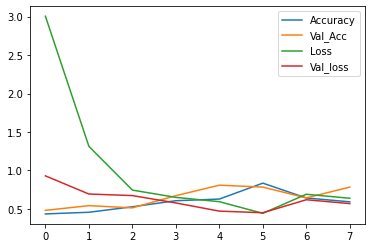

In [26]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Acc')

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_loss')

plt.legend()
plt.show()


#### Running the model on complete data

In [28]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', tf.keras.metrics.AUC()])

history = model.fit(train_data, validation_data=validation_data, epochs=10, callbacks=[earlystopping, model_checkpoint])

Epoch 1/10
35/35 [==============================] - 42s 1s/step - loss: 0.5072 - accuracy: 0.7769 - auc_1: 0.8451 - val_loss: 0.2970 - val_accuracy: 0.8489 - val_auc_1: 0.9488
INFO:tensorflow:Assets written to: /content/flower_model_binary/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
35/35 [==============================] - 33s 926ms/step - loss: 0.3148 - accuracy: 0.8710 - auc_1: 0.9422 - val_loss: 0.4010 - val_accuracy: 0.8201 - val_auc_1: 0.9128
Epoch 3/10
35/35 [==============================] - 33s 930ms/step - loss: 0.1829 - accuracy: 0.9310 - auc_1: 0.9806 - val_loss: 0.1389 - val_accuracy: 0.9353 - val_auc_1: 0.9881
INFO:tensorflow:Assets written to: /content/flower_model_binary/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/10
35/35 [==============================] - 33s 930ms/step - loss: 0.1070 - accuracy: 0.9624 - auc_1: 0.9920 - val_loss: 0.0867 - val_accuracy: 0.9748 - val_auc_1: 0.9946
INFO:tensorflow:Assets written to: /content/flower_model_binary/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/10
35/35 [==============================] - 33s 941ms/step - loss: 0.1710 - accuracy: 0.9606 - auc_1: 0.9838 - val_loss: 0.6959 - val_accuracy: 0.5144 - val_auc_1: 0.4693
Epoch 6/10
35/35 [==============================] - 32s 927ms/step - loss: 0.4552 - accuracy: 0.7849 - auc_1: 0.8701 - val_loss: 0.1392 - val_accuracy: 0.9460 - val_auc_1: 0.9891
Epoch 7/10
35/35 [==============================] - 33s 931ms/step - loss: 0.2713 - accuracy: 0.9140 - auc_1: 0.9604 - val_loss: 0.2870 - val_accuracy: 0.9209 - val_auc_1: 0.9718


In [29]:
final_binary_model = keras.models.load_model(filepath)
final_binary_model.evaluate(test_data)

5/5 [==============================] - 4s 657ms/step - loss: 0.0332 - accuracy: 0.9870 - auc_1: 0.9997


[0.03319576755166054, 0.9870129823684692, 0.9997471570968628]

### Model Building for Multi class classification 

#### Data Generator

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

prepro_fn = preprocess_input

# for ablation experiment
ablation_datagen = ImageDataGenerator(validation_split=0.9, preprocessing_function=prepro_fn )
ablation_train_data = ablation_datagen.flow_from_directory(dataset_path, subset='training')
ablation_validation_data = ablation_datagen.flow_from_directory(dataset_path, subset='validation')

# for final training
datagen  = ImageDataGenerator(validation_split=0.2,  preprocessing_function=prepro_fn )
train_data = datagen.flow_from_directory(dataset_path, subset='training')
validation_data = datagen.flow_from_directory(dataset_path, subset='validation')


test_datagen  = ImageDataGenerator(preprocessing_function=prepro_fn)
test_data = test_datagen.flow_from_directory(test_dataset)

Found 390 images belonging to 5 classes.
Found 3497 images belonging to 5 classes.
Found 3111 images belonging to 5 classes.
Found 776 images belonging to 5 classes.
Found 430 images belonging to 5 classes.


#### Model

In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
)

In [33]:
# building the model

image_dim = (224, 224)

inputs = keras.layers.Input(shape=[256,256, 3])
X = keras.layers.Resizing(*image_dim)(inputs)
X = base_model(inputs, training=False)
X = keras.layers.GlobalAveragePooling2D()(X)
X = keras.layers.Dropout(0.2)(X)
X = keras.layers.Dense(128, activation='relu')(X)
X = keras.layers.Dropout(0.5)(X)
outputs = keras.layers.Dense(5, activation='softmax')(X)

flower_model = keras.Model(inputs, outputs)


In [34]:
flower_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645 

In [35]:
earlystopping    = tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_accuracy', mode='max', restore_best_weights=True)

filepath = os.path.join(os.getcwd(), 'flower_model_multiclass')
if not os.path.exists(filepath):
  os.makedirs(filepath)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

In [36]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
flower_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', tf.keras.metrics.AUC(multi_label=True, num_labels=5)])

In [37]:
history = flower_model.fit(ablation_train_data, validation_data=validation_data, epochs=10, callbacks=[earlystopping, model_checkpoint])

Epoch 1/10
13/13 [==============================] - 27s 2s/step - loss: 1.6335 - accuracy: 0.3487 - auc_2: 0.6515 - val_loss: 2.1012 - val_accuracy: 0.2835 - val_auc_2: 0.7097
INFO:tensorflow:Assets written to: /content/flower_model_multiclass/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
13/13 [==============================] - 18s 1s/step - loss: 1.4545 - accuracy: 0.4308 - auc_2: 0.7240 - val_loss: 1.0678 - val_accuracy: 0.5399 - val_auc_2: 0.9001
INFO:tensorflow:Assets written to: /content/flower_model_multiclass/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/10
13/13 [==============================] - 18s 1s/step - loss: 1.5492 - accuracy: 0.4256 - auc_2: 0.7588 - val_loss: 1.2801 - val_accuracy: 0.4961 - val_auc_2: 0.8664
Epoch 4/10
13/13 [==============================] - 18s 1s/step - loss: 1.0528 - accuracy: 0.6077 - auc_2: 0.8589 - val_loss: 0.8231 - val_accuracy: 0.6881 - val_auc_2: 0.9294
INFO:tensorflow:Assets written to: /content/flower_model_multiclass/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/10
13/13 [==============================] - 18s 1s/step - loss: 0.7394 - accuracy: 0.7128 - auc_2: 0.9239 - val_loss: 0.7699 - val_accuracy: 0.7178 - val_auc_2: 0.9478
INFO:tensorflow:Assets written to: /content/flower_model_multiclass/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 6/10
13/13 [==============================] - 18s 1s/step - loss: 0.6459 - accuracy: 0.7436 - auc_2: 0.9436 - val_loss: 0.5270 - val_accuracy: 0.8235 - val_auc_2: 0.9688
INFO:tensorflow:Assets written to: /content/flower_model_multiclass/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 7/10
13/13 [==============================] - 18s 1s/step - loss: 0.5494 - accuracy: 0.7949 - auc_2: 0.9585 - val_loss: 0.5663 - val_accuracy: 0.7693 - val_auc_2: 0.9592
Epoch 8/10
13/13 [==============================] - 18s 1s/step - loss: 0.3308 - accuracy: 0.8923 - auc_2: 0.9835 - val_loss: 0.5744 - val_accuracy: 0.8041 - val_auc_2: 0.9636
Epoch 9/10
13/13 [==============================] - 18s 1s/step - loss: 0.5788 - accuracy: 0.8231 - auc_2: 0.9527 - val_loss: 0.5482 - val_accuracy: 0.7848 - val_auc_2: 0.9628


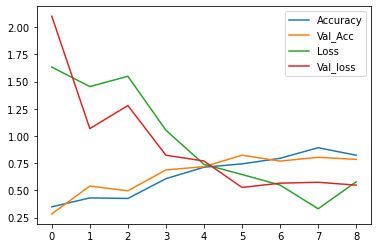

In [38]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Acc')

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_loss')

plt.legend()
plt.show()


#### Running the model on complete data

In [39]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
flower_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', tf.keras.metrics.AUC(multi_label=True, num_labels=5)])

history = flower_model.fit(train_data, validation_data=validation_data, epochs=10, callbacks=[earlystopping, model_checkpoint])

Epoch 1/10
98/98 [==============================] - 103s 978ms/step - loss: 0.5878 - accuracy: 0.7878 - auc_3: 0.9531 - val_loss: 0.6250 - val_accuracy: 0.7771 - val_auc_3: 0.9700
Epoch 2/10
98/98 [==============================] - 92s 941ms/step - loss: 0.3779 - accuracy: 0.8644 - auc_3: 0.9796 - val_loss: 0.3348 - val_accuracy: 0.8892 - val_auc_3: 0.9848
INFO:tensorflow:Assets written to: /content/flower_model_multiclass/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/10
98/98 [==============================] - 92s 941ms/step - loss: 0.2798 - accuracy: 0.9045 - auc_3: 0.9880 - val_loss: 0.2887 - val_accuracy: 0.9034 - val_auc_3: 0.9899
INFO:tensorflow:Assets written to: /content/flower_model_multiclass/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/10
98/98 [==============================] - 92s 938ms/step - loss: 0.2500 - accuracy: 0.9151 - auc_3: 0.9894 - val_loss: 0.3152 - val_accuracy: 0.9021 - val_auc_3: 0.9882
Epoch 5/10
98/98 [==============================] - 92s 941ms/step - loss: 0.2728 - accuracy: 0.9100 - auc_3: 0.9882 - val_loss: 0.2890 - val_accuracy: 0.9162 - val_auc_3: 0.9884
INFO:tensorflow:Assets written to: /content/flower_model_multiclass/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 6/10
98/98 [==============================] - 92s 937ms/step - loss: 0.1599 - accuracy: 0.9450 - auc_3: 0.9955 - val_loss: 0.2785 - val_accuracy: 0.9227 - val_auc_3: 0.9898
INFO:tensorflow:Assets written to: /content/flower_model_multiclass/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 7/10
98/98 [==============================] - 92s 938ms/step - loss: 0.1199 - accuracy: 0.9598 - auc_3: 0.9974 - val_loss: 0.3067 - val_accuracy: 0.9240 - val_auc_3: 0.9858
INFO:tensorflow:Assets written to: /content/flower_model_multiclass/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 8/10
98/98 [==============================] - 92s 936ms/step - loss: 0.3835 - accuracy: 0.8695 - auc_3: 0.9810 - val_loss: 0.7031 - val_accuracy: 0.7887 - val_auc_3: 0.9610
Epoch 9/10
50/98 [==============>...............] - ETA: 41s - loss: 57.1004 - accuracy: 0.8686 - auc_3: 0.9570

InvalidArgumentError: ignored

In [40]:
final_model = keras.models.load_model(filepath)
final_model.evaluate(test_data)

14/14 [==============================] - 8s 354ms/step - loss: 0.2180 - accuracy: 0.9442 - auc_3: 0.9902


[0.21798992156982422, 0.9441860318183899, 0.9902288317680359]

In [43]:
prediction = final_model.predict(validation_data)
np.argmax(prediction, axis=1)

array([4, 3, 2, 1, 0, 2, 1, 4, 4, 4, 3, 3, 3, 2, 2, 1, 1, 3, 4, 2, 2, 4,
       1, 0, 4, 0, 3, 0, 1, 0, 2, 4, 1, 0, 4, 2, 4, 2, 4, 1, 4, 1, 0, 0,
       3, 0, 1, 2, 4, 3, 1, 4, 0, 2, 4, 1, 3, 0, 1, 4, 2, 2, 1, 4, 1, 1,
       1, 0, 3, 1, 0, 4, 1, 3, 2, 4, 4, 1, 4, 1, 3, 3, 2, 0, 4, 3, 4, 3,
       1, 3, 1, 0, 3, 0, 0, 2, 3, 3, 3, 4, 3, 1, 1, 3, 2, 2, 4, 4, 2, 2,
       1, 4, 4, 2, 4, 4, 3, 2, 4, 2, 1, 1, 1, 0, 3, 0, 1, 3, 0, 0, 4, 2,
       1, 1, 2, 0, 4, 1, 4, 3, 4, 0, 4, 3, 2, 1, 0, 4, 4, 2, 3, 2, 4, 2,
       3, 0, 3, 0, 2, 4, 1, 0, 4, 3, 0, 4, 4, 2, 0, 0, 4, 3, 1, 3, 3, 0,
       1, 1, 4, 3, 4, 3, 1, 2, 1, 0, 1, 1, 3, 4, 4, 4, 3, 1, 2, 2, 1, 3,
       3, 1, 0, 3, 4, 2, 4, 1, 1, 4, 2, 4, 4, 3, 2, 1, 1, 0, 0, 1, 3, 3,
       4, 0, 3, 0, 3, 3, 3, 1, 1, 4, 0, 4, 1, 2, 2, 2, 0, 0, 4, 0, 0, 0,
       2, 4, 2, 3, 4, 4, 2, 4, 1, 2, 1, 4, 4, 4, 3, 2, 2, 3, 0, 2, 0, 0,
       3, 3, 3, 1, 3, 4, 0, 1, 1, 2, 3, 4, 4, 2, 4, 4, 2, 0, 0, 1, 1, 4,
       2, 4, 1, 1, 3, 1, 1, 4, 2, 1, 4, 1, 2, 1, 4,